In [1]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

In [3]:
## connecting mysql database

db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "Heisenbergbitch@1",
    database = "credit_card_details"
)

mycursor = db.cursor()
print(db)

In [5]:
## querying to get relevant columns from different tables

query = """SELECT 
      transactions.transaction_date,
      card_holder.id,
      card_holder.username,
      credit_card.card,
      transactions.amount,
      merchant_category.category
FROM card_holder
JOIN credit_card
     ON credit_card.card_holder_id = card_holder.id
JOIN transactions
     ON transactions.card = credit_card.card
JOIN merchant
     ON merchant.id = transactions.merchant_id
JOIN merchant_category
     ON merchant_category.id = merchant.merchant_category_id"""
 
credit_data = pd.read_sql(query, db)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26116\3658133901.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  credit_data = pd.read_sql(query, db)


In [7]:
credit_data.head()

,transaction_date,id,username,card,amount,category
0,2018-04-24 05:49:59,24,Stephanie Dalton,3582198969197591,10.09,restaurant
1,2018-10-23 21:30:36,24,Stephanie Dalton,3582198969197591,10.62,restaurant
2,2018-01-12 02:18:05,24,Stephanie Dalton,3582198969197591,11.52,restaurant
3,2018-04-21 10:32:39,24,Stephanie Dalton,3582198969197591,13.67,restaurant
4,2018-11-13 13:53:16,24,Stephanie Dalton,3582198969197591,2.81,restaurant


<Axes: xlabel='[amount]', ylabel='[transaction_date]'>

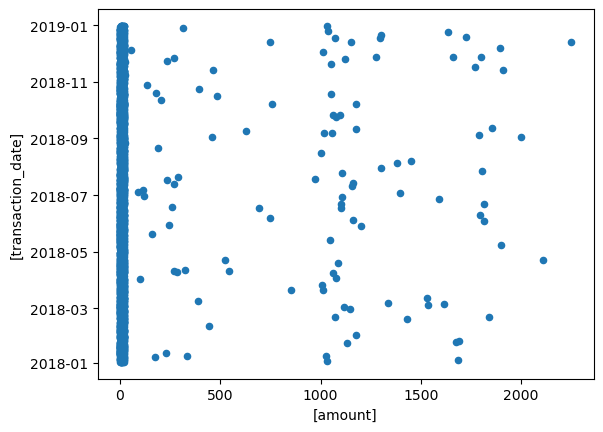

In [9]:
## scatter plot to visualize outliers

credit_data.plot.scatter(['amount'], ['transaction_date'])

In [11]:
credit_data.describe()

,transaction_date,id,amount
count,3500,3500.000000,3500.000000
mean,2018-06-29 23:14:12.326286080,13.371714,40.789129
min,2018-01-01 21:35:10,1.000000,0.510000
25%,2018-03-29 00:24:14,8.000000,3.735000
50%,2018-06-29 08:34:01,13.000000,10.270000
75%,2018-09-30 18:08:04.750000128,19.000000,14.647500
max,2018-12-31 09:50:25,25.000000,2249.000000
std,NaN,6.882208,202.042922


In [13]:
credit_data

,transaction_date,id,username,card,amount,category
0,2018-04-24 05:49:59,24,Stephanie Dalton,3582198969197591,10.09,restaurant
1,2018-10-23 21:30:36,24,Stephanie Dalton,3582198969197591,10.62,restaurant
2,2018-01-12 02:18:05,24,Stephanie Dalton,3582198969197591,11.52,restaurant
3,2018-04-21 10:32:39,24,Stephanie Dalton,3582198969197591,13.67,restaurant
4,2018-11-13 13:53:16,24,Stephanie Dalton,3582198969197591,2.81,restaurant
...,...,...,...,...,...,...
3495,2018-09-14 12:25:56,24,Stephanie Dalton,3582198969197591,16.42,bar
3496,2018-12-26 16:08:52,24,Stephanie Dalton,3582198969197591,18.75,bar
3497,2018-04-25 05:22:58,24,Stephanie Dalton,3582198969197591,15.76,bar
3498,2018-06-17 10:00:50,24,Stephanie Dalton,3582198969197591,11.21,bar


In [ ]:
## z-score method

In [17]:
## defining upper and lower limit

upper_limit = credit_data['amount'].mean() + 3*credit_data['amount'].std()
lower_limit = credit_data['amount'].mean() - 3*credit_data['amount'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 646.9178951594406
lower limit: -565.3396380165834


In [19]:
## identifying outliers

credit_data.loc[(credit_data['amount'] > upper_limit) | (credit_data['amount'] < lower_limit)]

,transaction_date,id,username,card,amount,category
9,2018-05-08 13:21:01,24,Stephanie Dalton,30142966699187,1901.0,restaurant
169,2018-02-19 22:48:25,18,Malik Carlson,344119623920892,1839.0,restaurant
175,2018-09-10 22:49:41,18,Malik Carlson,344119623920892,1176.0,restaurant
176,2018-04-03 03:23:37,18,Malik Carlson,344119623920892,1077.0,restaurant
177,2018-12-13 12:09:58,18,Malik Carlson,344119623920892,1154.0,restaurant
...,...,...,...,...,...,...
3382,2018-05-13 06:31:20,25,Nancy Contreras,4319653513507,1046.0,food truck
3426,2018-01-30 18:31:00,25,Nancy Contreras,4319653513507,1177.0,restaurant
3429,2018-06-06 21:50:17,25,Nancy Contreras,4319653513507,749.0,restaurant
3466,2018-03-06 07:18:09,25,Nancy Contreras,4319653513507,1334.0,bar


In [21]:
## removing outliers

new_credit_data = credit_data.loc[(credit_data['amount'] < upper_limit) & (credit_data['amount'] > lower_limit)]
print('before removing outliers', len(credit_data))
print('after removing outliers', len(new_credit_data))
print('outliers', len(credit_data) - len(new_credit_data))

before removing outliers 3500
after removing outliers 3423
outliers 77


In [ ]:
## using interquartile range method

In [23]:
## calculating interquartile range

q1 = credit_data['amount'].quantile(0.25)
q3 = credit_data['amount'].quantile(0.75)
iqr = q3 - q1

In [25]:
q1, q3, iqr

(3.7350000000000003, 14.6475, 10.912500000000001)

In [27]:
## defining upper and lower limit

upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
upper_limit, lower_limit

(31.016250000000003, -12.633750000000003)

In [29]:
## identifying outliers

credit_data.loc[(credit_data['amount'] > upper_limit) | (credit_data['amount'] < lower_limit)]

,transaction_date,id,username,card,amount,category
9,2018-05-08 13:21:01,24,Stephanie Dalton,30142966699187,1901.0,restaurant
10,2018-04-21 18:40:47,24,Stephanie Dalton,30142966699187,525.0,restaurant
15,2018-07-21 11:08:39,24,Stephanie Dalton,30142966699187,291.0,restaurant
16,2018-06-18 23:05:30,24,Stephanie Dalton,30142966699187,258.0,restaurant
169,2018-02-19 22:48:25,18,Malik Carlson,344119623920892,1839.0,restaurant
...,...,...,...,...,...,...
3426,2018-01-30 18:31:00,25,Nancy Contreras,4319653513507,1177.0,restaurant
3428,2018-04-09 18:28:25,25,Nancy Contreras,4319653513507,269.0,restaurant
3429,2018-06-06 21:50:17,25,Nancy Contreras,4319653513507,749.0,restaurant
3466,2018-03-06 07:18:09,25,Nancy Contreras,4319653513507,1334.0,bar


In [31]:
## removing outliers

new_credit_data = credit_data.loc[(credit_data['amount'] < upper_limit) & (credit_data['amount'] > lower_limit)]
print('before removing outliers', len(credit_data))
print('after removing outliers', len(new_credit_data))
print('outliers', len(credit_data) - len(new_credit_data))

before removing outliers 3500
after removing outliers 3390
outliers 110
